In [1]:
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
print("Import of required Libraries Successfully done")

Import of required Libraries Successfully done


### Reading and Cleaning the Data Source for further analysis

In [2]:
#Reading data
df = pd.read_csv(
    r"./data/Air_Traffic_Passenger_Statistics.csv"
    # "https://data.sfgov.org/resource/rkru-6vcg.csv"
)

# convert activity period to year-month format as column Year_Month and Creating Year column
df = df.assign(
    Year_Month=pd.to_datetime(df["Activity Period"], format="%Y%m").apply(
        lambda x: x.strftime("%B-%Y")
    ),
    Year=pd.to_datetime(df["Activity Period"], format="%Y%m").dt.strftime("%Y"),
)

#cleaning the data
df["Operating Airline"] = df["Operating Airline"].str.replace(
    "United Airlines - Pre 07/01/2013", "United Airlines"
)

df.tail(1)



,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year_Month,Year
50729,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,1857,December-2022,2022


In [3]:
# creating the aggregate data of passenger data calculating the passenger count of each Airlines Year by Year 
# and retaining only top 10 of each year as df_summary

df_summary = (
    df[["Passenger Count", "Operating Airline", "Year"]]
    .groupby(["Year", "Operating Airline"])
    .agg(Passenger_Count=("Passenger Count", "sum"))
    .reset_index()
    .sort_values(["Year", "Passenger_Count"], ascending=[True, False])
    .groupby(["Year"], as_index=False, sort=False)
    .nth[:10].reset_index(drop = True)
)
df_summary.columns
df_summary.head()




,Year,Operating Airline,Passenger_Count
0,2005,United Airlines,15338298
1,2005,American Airlines,3438824
2,2005,SkyWest Airlines,2568754
3,2005,Delta Air Lines,2072072
4,2005,US Airways,1731352


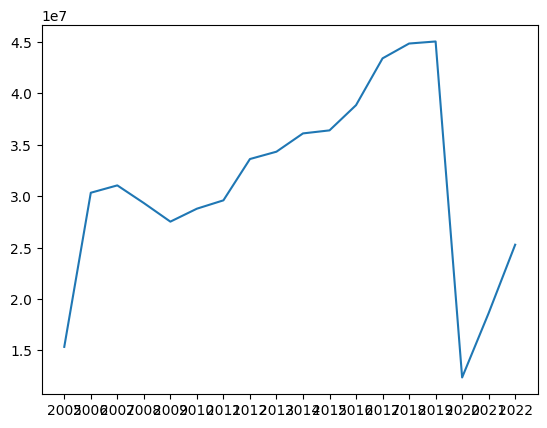

In [4]:
#Just the basic plot without any additional details for a single airlines
plt.plot(df_summary[df_summary['Operating Airline']=='United Airlines']['Year'], \
        df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'])
_ = plt.show()

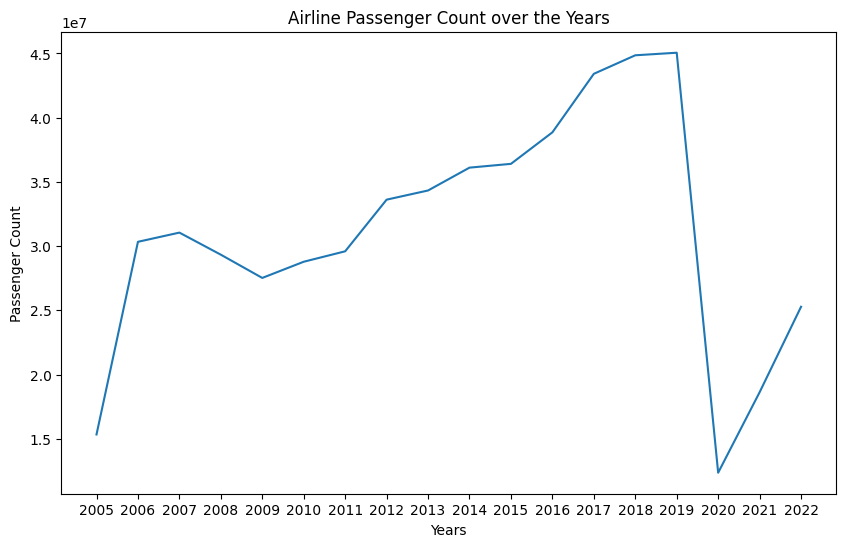

In [5]:
# Now we will add Title and labels

plt.figure(figsize=(10,6)) # to Increase the size of plot and make it bigger
plt.plot(df_summary[df_summary['Operating Airline']=='United Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'])
plt.title("Airline Passenger Count over the Years")
plt.xlabel("Years")
plt.ylabel("Passenger Count")
_ = plt.show()



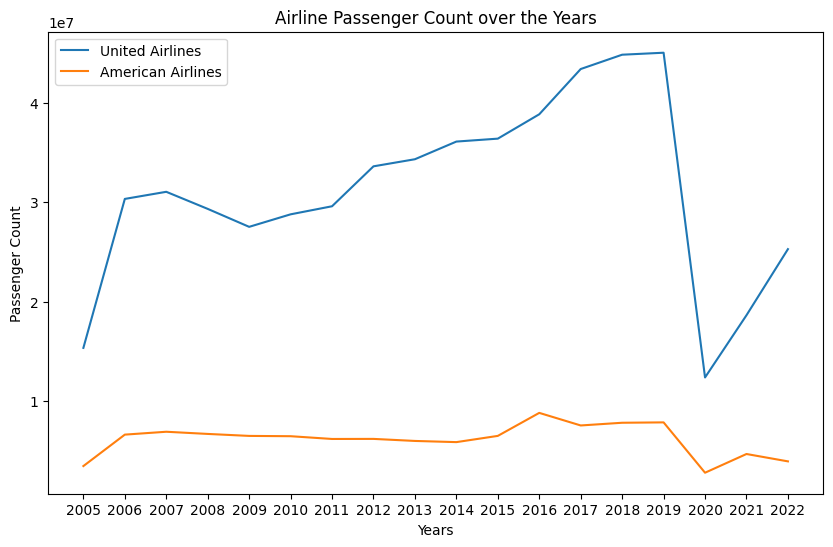

In [6]:
# Now we will add another line by adding another airlines data on the same plot.
# Also we will add label to each line so that same can be used in legend

plt.figure(figsize=(10,6)) # to Increase the size of plot and make it bigger
plt.plot(df_summary[df_summary['Operating Airline']=='United Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'], label = "United Airlines")
plt.plot(df_summary[df_summary['Operating Airline']=='American Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='American Airlines']['Passenger_Count'], label = "American Airlines")
plt.title("Airline Passenger Count over the Years")
plt.xlabel("Years")
plt.ylabel("Passenger Count")
#label parameter within plt.plot can be used for legend
plt.legend()
_ = plt.show()

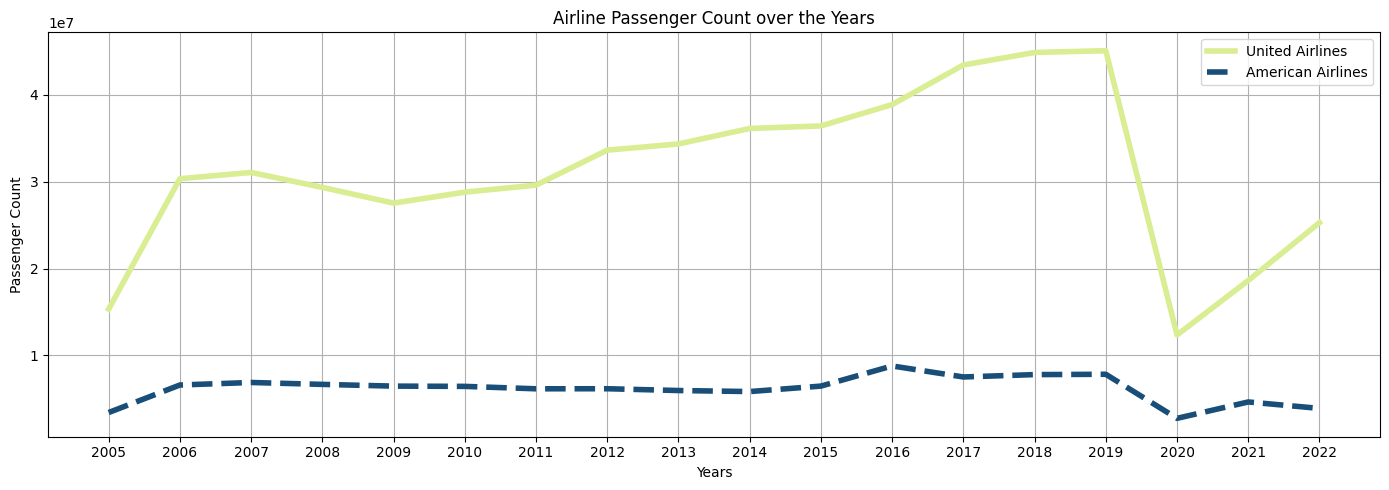

In [7]:
# We will change the COLOR and LINESTYLE  of the lines
# Linewidth can be changed using linewidth argument
# plt.tight_layout() function can adjust the padding automatically.
# plt.grid(true) to enable grid layout

plt.figure(figsize=(14,5)) # to Increase the size of plot and make it bigger
plt.plot(df_summary[df_summary['Operating Airline']=='United Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'],\
                label = "United Airlines", color = '#d9ed92ff', linestyle = 'solid', linewidth = 4)
plt.plot(df_summary[df_summary['Operating Airline']=='American Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='American Airlines']['Passenger_Count'], \
                label = "American Airlines", color = '#184e77ff', linestyle = 'dashed', linewidth = 4)
plt.title("Airline Passenger Count over the Years")
plt.xlabel("Years")
plt.ylabel("Passenger Count")

plt.legend()
plt.tight_layout()
plt.grid('True')

_ = plt.show()

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


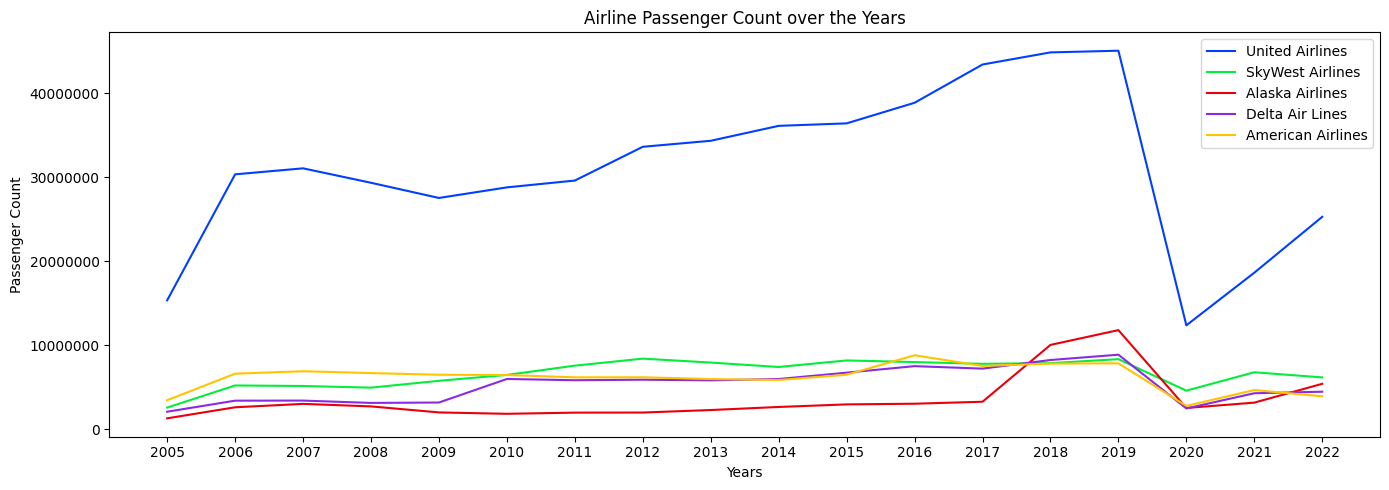

In [12]:
# Use inbuilt style and remove the color and other styling elements
# to save the plot we can use savefig

plt.figure(figsize=(14,5)) # to Increase the size of plot and make it bigger
plt.plot(df_summary[df_summary['Operating Airline']=='United Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'],\
                label = "United Airlines")
plt.plot(df_summary[df_summary['Operating Airline']=='SkyWest Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='SkyWest Airlines']['Passenger_Count'], \
                label = "SkyWest Airlines")
plt.plot(df_summary[df_summary['Operating Airline']=='Alaska Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='Alaska Airlines']['Passenger_Count'], \
                label = "Alaska Airlines")
plt.plot(df_summary[df_summary['Operating Airline']=='Delta Air Lines']['Year'], \
            df_summary[df_summary['Operating Airline']=='Delta Air Lines']['Passenger_Count'], \
                label = "Delta Air Lines")
plt.plot(df_summary[df_summary['Operating Airline']=='American Airlines']['Year'], \
            df_summary[df_summary['Operating Airline']=='American Airlines']['Passenger_Count'], \
                label = "American Airlines")
plt.title("Airline Passenger Count over the Years")
plt.xlabel("Years")
plt.ylabel("Passenger Count")

plt.legend()
plt.tight_layout()
#plt.grid('True')
plt.style.use('seaborn-v0_8-bright')
#plt.xaxis.set_major_formatter(formatter)
plt.ticklabel_format(axis = 'y', style = 'plain') # to disable scientific notation
plt.tight_layout()
# plt.xkcd()
plt.savefig("San_Francisco_Passenger_count_styling.png")

_ = plt.show()


Starting with video 2 of this series https://www.youtube.com/watch?v=nKxLfUrkLE8&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=2

Now we will create bar charts and customize it



In [33]:
df_summary['Year'] = df_summary['Year'].astype('int32')
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               180 non-null    int32 
 1   Operating Airline  180 non-null    object
 2   Passenger_Count    180 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 3.6+ KB


In [35]:
df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count']

2022

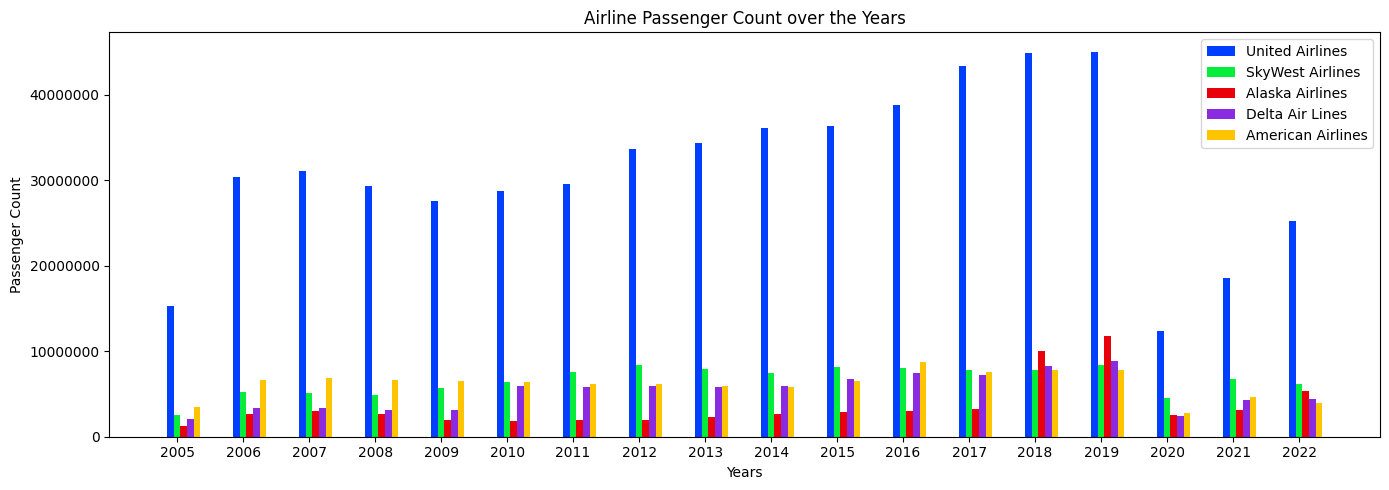

In [55]:
# creating bar plot with existing data
# by default bar plot will overlap  so we have get the range of each bar x value and then give the width of each bar
# import numpy

import numpy as np

plt.figure(figsize=(14,5)) # to Increase the size of plot and make it bigger

# Get range of X axis
indexes_x = np.arange(len(df_summary[df_summary['Operating Airline']=='United Airlines']['Year']))
print(indexes_x)


#print(indexes_x)
width = 0.10 #define width of bars and this needs to adjusted according to number of bars

plt.xticks(ticks=indexes_x, labels=df_summary[df_summary['Operating Airline']=='United Airlines']['Year']) # to set the xticks correctly as year

plt.bar(indexes_x-width, \
            df_summary[df_summary['Operating Airline']=='United Airlines']['Passenger_Count'],\
                label = "United Airlines", width = width)
plt.bar(indexes_x, \
            df_summary[df_summary['Operating Airline']=='SkyWest Airlines']['Passenger_Count'], \
                label = "SkyWest Airlines", width = width)
indexes_x = indexes_x + width
plt.bar(indexes_x, \
            df_summary[df_summary['Operating Airline']=='Alaska Airlines']['Passenger_Count'], \
                label = "Alaska Airlines", width = width)
indexes_x = indexes_x + width
plt.bar(indexes_x, \
            df_summary[df_summary['Operating Airline']=='Delta Air Lines']['Passenger_Count'], \
                label = "Delta Air Lines", width = width)
indexes_x = indexes_x + width
plt.bar(indexes_x, \
            df_summary[df_summary['Operating Airline']=='American Airlines']['Passenger_Count'], \
                label = "American Airlines", width = width)



plt.title("Airline Passenger Count over the Years")
plt.xlabel("Years")
plt.ylabel("Passenger Count")

plt.legend()
plt.tight_layout()
#plt.grid('True')
plt.style.use('seaborn-v0_8-bright')

plt.ticklabel_format(axis = 'y', style = 'plain') # to disable scientific notation
plt.tight_layout()
# plt.xkcd()
plt.savefig("San_Francisco_Passenger_count_bar.png")

_ = plt.show()



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


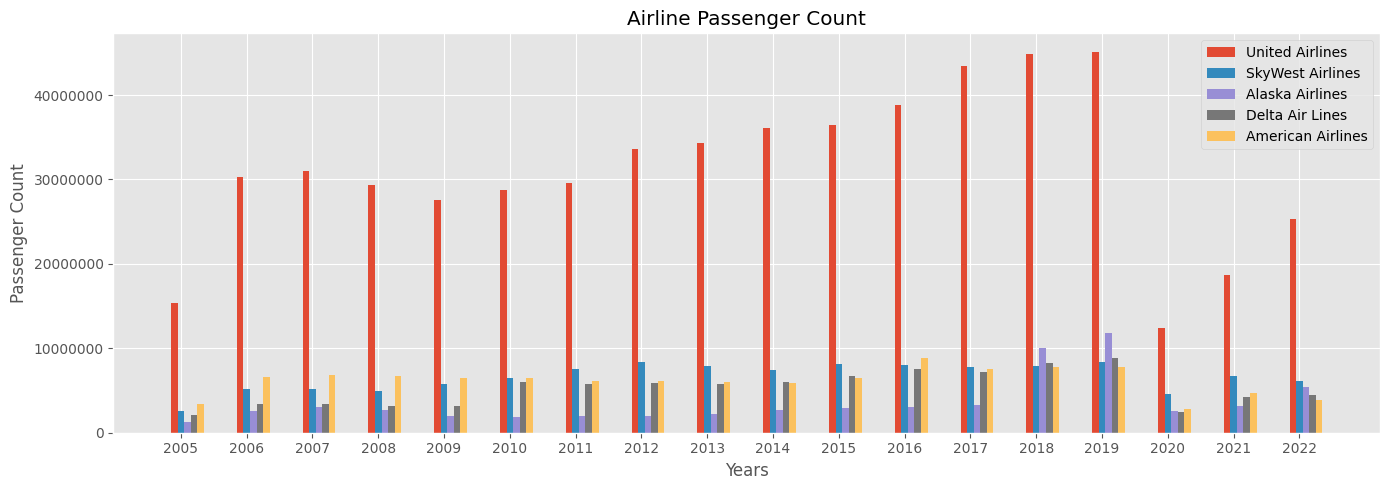

In [68]:
# Now instead of hardcoding the columns we will loop over it and change the width of bar accordingly

import numpy as np

plt.figure(figsize=(14,5)) # to Increase the size of plot and make it bigger

# Get range of X axis
indexes_x = np.arange(len(df_summary[df_summary['Operating Airline']=='United Airlines']['Year']))
print(indexes_x)


#print(indexes_x)
width = 0.10 #define width of bars and this needs to adjusted according to number of bars

plt.xticks(ticks=indexes_x, labels=df_summary[df_summary['Operating Airline']=='United Airlines']['Year']) # to set the xticks correctly as year

airlines = ['United Airlines', 'SkyWest Airlines', 'Alaska Airlines', 'Delta Air Lines','American Airlines',]
indexes_x = indexes_x - width
for airline in airlines:
    

    plt.bar(indexes_x, \
                df_summary[df_summary['Operating Airline']==airline]['Passenger_Count'],\
                    label = airline, width = width)
    indexes_x += width
    



plt.title("Airline Passenger Count")
plt.xlabel("Years")
plt.ylabel("Passenger Count")

plt.legend()
plt.tight_layout()
#plt.grid('True')
plt.style.use('ggplot')

plt.ticklabel_format(axis = 'y', style = 'plain') # to disable scientific notation
plt.tight_layout()
# plt.xkcd()
plt.savefig("San_Francisco_Passenger_count_ggplot_bar.png")

_ = plt.show()
